In [55]:
#importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [56]:
#loading data

df = pd.read_csv('diabetes.csv')

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [59]:
X = df.iloc[:, :8]
y = df.iloc[:, -1]

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [65]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#creating model

model = Sequential()  #sequential model
model.add(Dense(32, activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))  #dense layer

In [66]:
#compiling model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,min_delta=0.00001,mode='auto'),



In [67]:
#running the model
hs = model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test),callbacks=callback)

Epoch 1/10
20/20 [==============================] - 2s 29ms/step - loss: 0.6719 - Accuracy: 0.6010 - val_loss: 0.6546 - val_Accuracy: 0.6039
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6193 - Accuracy: 0.6775 - val_loss: 0.6101 - val_Accuracy: 0.6818
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5849 - Accuracy: 0.7134 - val_loss: 0.5757 - val_Accuracy: 0.7597
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5609 - Accuracy: 0.7248 - val_loss: 0.5533 - val_Accuracy: 0.7662
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5417 - Accuracy: 0.7296 - val_loss: 0.5337 - val_Accuracy: 0.7662
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5267 - Accuracy: 0.7296 - val_loss: 0.5161 - val_Accuracy: 0.7597
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5129 - Accuracy: 0.7362 - val_loss: 0.5043 - val_Accuracy: 0.7987
Epoch 8/10
20/20 [=

In [69]:
model.evaluate(x_test, y_test, verbose=2)

5/5 - 0s - loss: 0.4805 - Accuracy: 0.7922 - 79ms/epoch - 16ms/step


[0.4805024266242981, 0.7922077775001526]

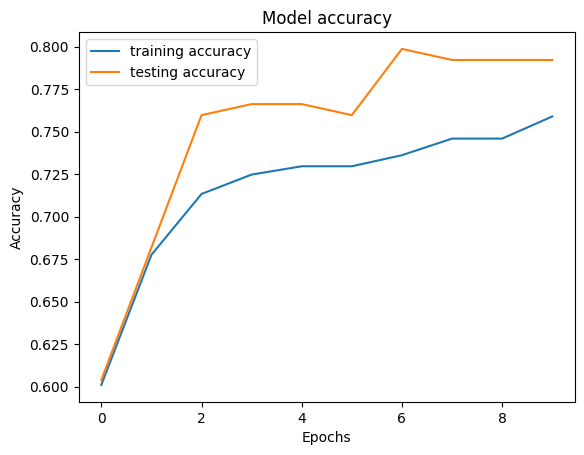

In [72]:
plt.plot(hs.history['Accuracy'],label='training accuracy')
plt.plot(hs.history['val_Accuracy'],label='testing accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

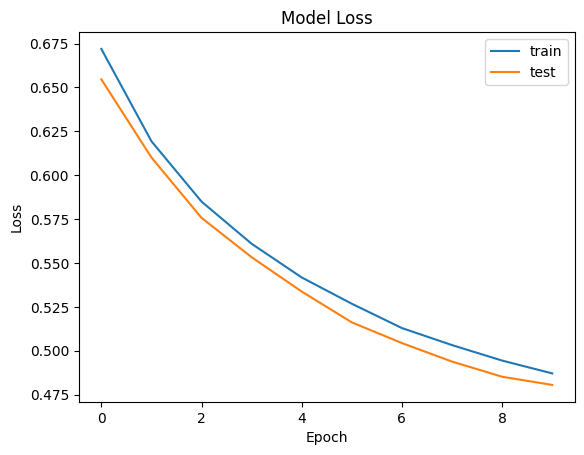

In [73]:
plt.plot(hs.history['loss'],label='train')
plt.plot(hs.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()